# Load data

In [1]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2

/home/andrey/anaconda3/envs/venv/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
target_field = 'target'
treatment_field = 'treatment'

In [3]:
train = pd.read_parquet('data/train.parquet')
valid = pd.read_parquet('data/valid.parquet')
test = pd.read_parquet('data/test.parquet')

In [4]:
# from sklearn.model_selection import train_test_split
# from sklift.datasets import fetch_lenta
# lenta_dataset = fetch_lenta()
# df = lenta_dataset.data
# df[target_field] = lenta_dataset[target_field]
# df[treatment_field] = lenta_dataset[treatment_field].map({'test': 1, 'control': 0})
# train, test = train_test_split(df, stratify=df[[treatment_field, target_field]])
# train, valid = train_test_split(train, stratify=train[[treatment_field, target_field]])
# train.to_parquet('data/train.parquet')
# valid.to_parquet('data/valid.parquet')
# test.to_parquet('data/test.parquet')

# Create dataset

In [5]:
from modules.data import Dataset

In [6]:
dataset = Dataset(
    train = train,
    valid = valid,
    test = test,
    
    treatment_field = treatment_field,
    target_field = target_field, 
    show_stats=True
)

 Num features:  192 / 193 ['age', 'cheque_count_12m_g20', 'cheque_count_12m_g21', 'cheque_count_12m_g25', 'cheque_count_12m_g32', 'cheque_count_12m_g33', 'cheque_count_12m_g38', 'cheque_count_12m_g39', 'cheque_count_12m_g41', 'cheque_count_12m_g42'], ...]
 Cat features:  1 / 193 ['gender']

train stats

,n obs,% of population,mean target
treatment,,,
0,96264,24.909627,0.102582
1,290189,75.090373,0.110125


valid stats

,n obs,% of population,mean target
treatment,,,
0,32088,24.909562,0.102562
1,96730,75.090438,0.110131


test stats

,n obs,% of population,mean target
treatment,,,
0,42785,24.910048,0.102583
1,128973,75.089952,0.110124


# Feature filtering

In [7]:
from modules.data import delete_constant_features
delete_constant_features(dataset)

0 features were removed.
The remaining number of factors is 193


In [8]:
from modules.data import delete_nan_features
delete_nan_features(dataset)

0 features were removed.
The remaining number of factors is 193


In [9]:
from modules.data import delete_high_cardinality_cat_features
delete_high_cardinality_cat_features(dataset, mean_unique_values=0.05)

0 features were removed.
The remaining number of factors is 193


/home/andrey/easylift/modules/data.py:189: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if dataset['train'][feature].value_counts(True)[0] < mean_unique_values:


In [10]:
from modules.data import delete_duplicated_features
delete_duplicated_features(dataset)

193it [00:33,  5.76it/s]

0 features were removed.
The remaining number of factors is 193


In [11]:
from modules.data import delete_high_corr_features
delete_high_corr_features(dataset)

5 features were removed.
The remaining number of factors is 188


In [12]:
from modules.data import F_filter
F_filter(dataset)

83 features were removed.
The remaining number of factors is 105


In [13]:
from modules.data import LR_filter
LR_filter(dataset)

95 features were removed.
The remaining number of factors is 10


In [14]:
from modules.data import KL_filter
KL_filter(dataset)

5 features were removed.
The remaining number of factors is 5


# Adversarial validation

In [15]:
from modules.data import adversarial_tg_cg, adversarial_split_quality

4it [00:05,  1.38s/it]


ROC-AUC in valid TG/CG: 0.5143


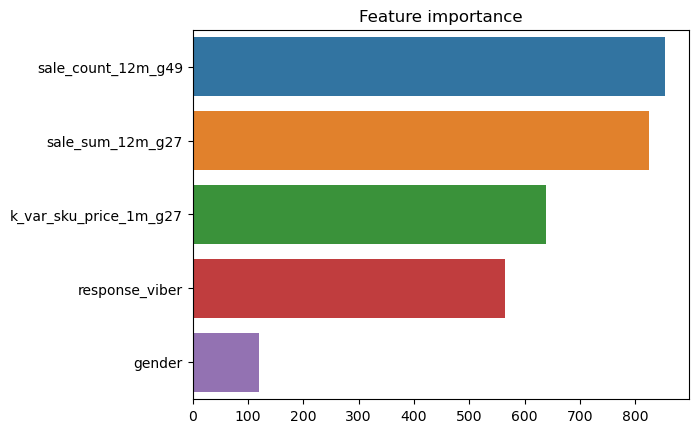

In [29]:
adversarial_tg_cg(dataset, 'valid')

4it [00:10,  2.53s/it]


ROC-AUC in valid/test split: 0.5008


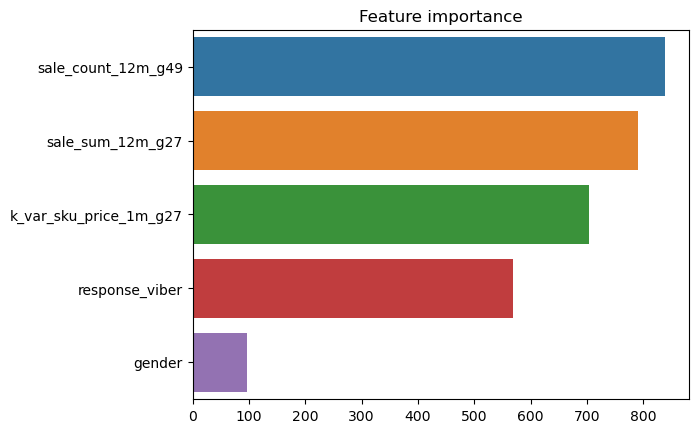

In [30]:
adversarial_split_quality(dataset, 'valid', 'test')

# Statistical checks of A/B test

In [18]:
from modules.data import two_proprotions_confint

In [19]:
two_proprotions_confint(dataset, 0.05)

Proportions difference: 0.0075471269267721325
Confidence interval: (0.005874979822561885, 0.00921927403098238)
0 in confidence interval: False


In [21]:
psi_cg_tg(dataset, sample='valid')

100%|█████████████████████████████████████████████| 5/5 [00:01<00:00,  3.89it/s]


,feature,psi
1,response_viber,0.007414
3,sale_sum_12m_g27,0.002037
2,sale_count_12m_g49,0.001757
4,gender,0.001311
0,k_var_sku_price_1m_g27,0.001235
